准备环境

In [1]:
import pandas as pd
import numpy as np
import sys
reload(sys)
sys.setdefaultencoding('utf-8')
import matplotlib as mpl
import matplotlib.cm as cm   
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

# 设置坐标轴标签的透明度和大小

Axes标签对我们理解图表非常重要，它描述了图表中展现的数据内容。我们首先来了解一下matplotlib是如何组织图表的。

最上层是一个Figure实例。Figure实例包含了一个Axes实例字段Figure.axes。

Axes实例几乎包含了我们所关心的所有东西，如所有的线、点、刻度和标签。当我们调用plot()方法时，就会向Axes.lines列表添加一个线条的实例。如果绘制了一个直方图（调用hist()），就会向Axes.patches列表添加许多矩阵。Axes实例也包含了XAxis和YAxis实例的引用，分别指向相应的x轴和y轴。XAxis和YAxis管理坐标轴、标签、刻度、刻度标签、定位器和格式器的绘制。得到标签对象还有个捷径，使用matplotlib.pyplot.xlabel()和matplotlib.pyplot.ylabel()。

操作步骤：
1.创建一个基于一些随机生成的数据的plot。
2.添加title和axes标签。
3.添加alpha设置。
4.向title和axes标签添加阴影效果。

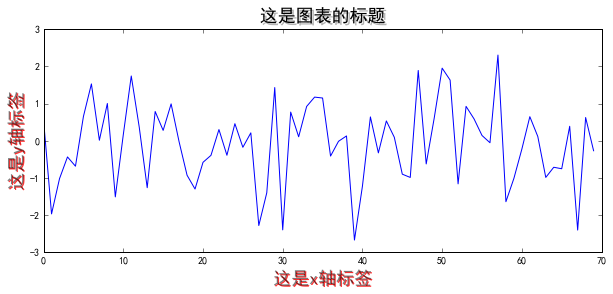

In [2]:
from matplotlib import patheffects
data = np.random.randn(70)
fontsize = 18
plt.figure(figsize=(10,4))
plt.plot(data)
title = "这是图表的标题"
x_label = "这是x轴标签"
y_label = "这是y轴标签"
# 添加一个标题(title)，设置标题字体大小(fontsize)，并设置标题文本的垂直对齐方式(verticalalignment)为bottom
# 文本的垂直对齐方式有center、top和baseline
title_text_obj = plt.title(title, fontsize=fontsize, verticalalignment='bottom')
# patheffects.withSimplePatchShadow()不带参数，为标题添加默认阴影效果
title_text_obj.set_path_effects([patheffects.withSimplePatchShadow()])
offset_xy = (1, -1)
rgbRed = (1.0, 0.0, 0.0)
alpha = 0.8
# 书中matplotlib版本为1.2.1，参数为offset_xy,patch_alpha,这里使用的matplotlib版本为1.5.0
# offset为相对于父对象(这里标题文本对象)的阴影的位置，shadow_rgbFace设置阴影颜色，alpha设置阴影的透明度
pe = patheffects.withSimplePatchShadow(offset=offset_xy, shadow_rgbFace=rgbRed, alpha=alpha)
# 得到x轴label对象
xlabel_obj = plt.xlabel(x_label, fontsize=fontsize, alpha=0.5)
# 对x轴标签应用阴影效果
xlabel_obj.set_path_effects([pe])
# 得到y轴label对象
ylabel_obj = plt.ylabel(y_label, fontsize=fontsize, alpha=0.5)
# 对y轴标签应用阴影效果
ylabel_obj.set_path_effects([pe])
plt.show()


# 为图表线条添加阴影

为了区分图表中的某一线条，或者仅仅为了保持包含图表在内的所有表格的总体风格，有事需要为图表线条（或直方图）添加阴影效果。

为了向图表中的线条或者矩形条添加阴影，需要使用matplotlib内置的transformation框架，位于matplotlib.transforms模块中。

matplotlib.transforms.ScaledTranslation(xtr, ytr, scaletr)方法用来做偏移转换。xtr和ytr是转换的偏移量，scaletr是一个转换可调用对象，在转换时和显示之前对xtr和ytr进行比例调整。最常用的情况是从点转换到显示区域，这样偏移始终保持在相同的位置而与实际的输出设备无关。

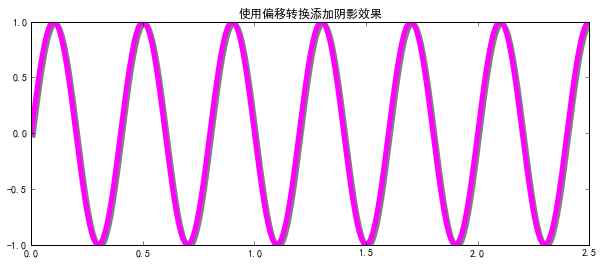

In [4]:
from matplotlib import transforms
# 创建figure和axes
fig = plt.figure(figsize=(10,4))
axes = fig.add_subplot(111)
# 生成一个正弦波数据
t = np.arange(0., 2.5, 0.01)
s = np.sin(5 * np.pi * t)
# 绘制出基本的信号图
line, = axes.plot(t, s, linewidth=5, color='magenta')
# 进行阴影坐标转换并绘制出阴影
delta = 2/72.  # dx和dy是以点为单位，点是1/72英寸，这里指2pt
offset = transforms.ScaledTranslation(delta, -delta,fig.dpi_scale_trans)
offset_transform = axes.transData + offset
axes.plot(t, s, linewidth=5, color='gray', transform=offset_transform, zorder=0.5 * line.get_zorder())
axes.set_title('使用偏移转换添加阴影效果')
plt.show()


# 向图表添加数据表

为数据绘制可视化图形的主要目的是解释那些不能理解（或很难理解）的数据值，仅仅在图表下面生硬地添加一张大表格是不明智的。

但在图表中添加一些强调非常重要的值（来自数据整体集合的总结性或突出强调的值）是非常重要的。

使用plt.table()方式创建带单元格的表格，并把它添加到当前坐标轴中。表格可以有行标题和列标题。每个单元格包含文本或补片。表格的列宽和行高是可以指定的。返回值是一个组成表格的对象（文本、线条和补片实例）的序列。

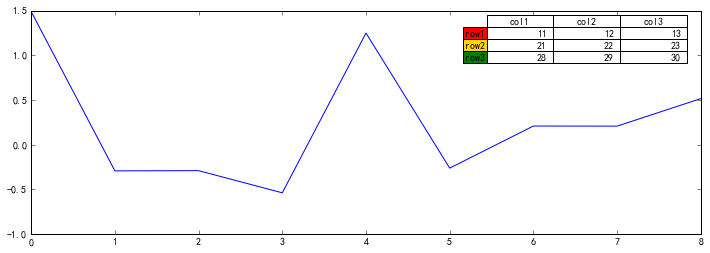

In [7]:
plt.figure(figsize=(12, 4))
ax = plt.gca()
y = np.random.randn(9)
col_labels = ['col1', 'col2', 'col3']
row_labels = ['row1', 'row2', 'row3']
table_vals = [[11, 12, 13], [21, 22, 23], [28, 29, 30]]
row_colors = ['red', 'gold', 'green']
my_table = plt.table(cellText=table_vals,   # 单元格文本
                    colWidths=[0.1]*3,      # 列宽
                    rowLabels=row_labels,   # 行标题
                    colLabels=col_labels,   # 列标题
                    rowColours=row_colors,  # 行标题单元格填充颜色
                    loc='upper right')      # 表格位置
plt.plot(y)
plt.show()

# 使用subplots（子区）

这里将演示matplotlib工具包的另一个helper函数——subplot2grid——的例子。我们用subplot2grid定义了网格的几何形状和子区的位置。注意位置是基于0的，而不是像在plot.subplot()中那样基于1。也可以使用colspan和rowspan来让子区跨越给定网格中的多个行和列。

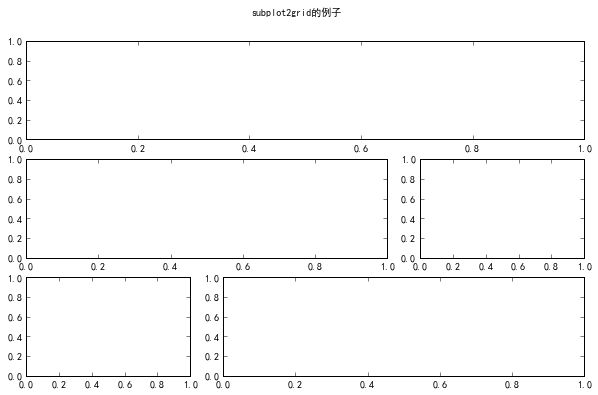

In [8]:
fig = plt.figure(figsize=(10, 6))
# 向subplot2grid方法传入形状参数(3,3),位置参数(第二个参数)和可选的rowspan及colspan参数
axes1 = plt.subplot2grid((3, 3), (0, 0), colspan=3) # 图表形状是3行3列的，选取第0行第0列的子区，并且第0行合并了3列成一个子区
axes2 = plt.subplot2grid((3, 3), (1, 0), colspan=2)
axes3 = plt.subplot2grid((3, 3), (1, 2))
axes4 = plt.subplot2grid((3, 3), (2, 0))
axes5 = plt.subplot2grid((3, 3), (2, 1), colspan=2)
all_axes = plt.gcf().axes
for ax in all_axes:
    for ticklabel in ax.get_xticklabels() + ax.get_yticklabels():
        ticklabel.set_fontsize(10)
plt.suptitle("subplot2grid的例子")
plt.show()

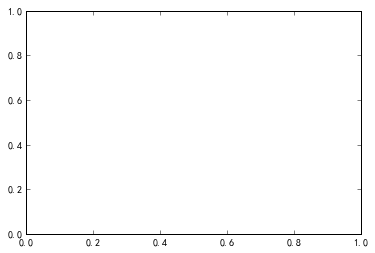

In [25]:
fig = plt.figure()
axes = fig.add_subplot(111)
# rectangle = axes.patch
# rectangle.set_facecolor('blue')
rect =mpl.patches.Rectangle((1, 1), width=6, height=12)
axes.add_patch(rect)
axes.figure.canvas.draw()
# plt.show()

# 定制化网格

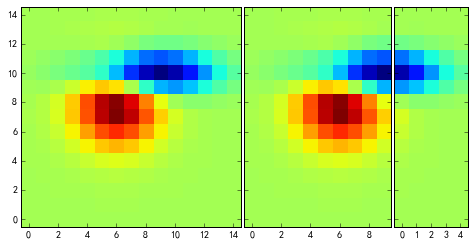

In [13]:
from mpl_toolkits.axes_grid1 import ImageGrid
from matplotlib.cbook import get_sample_data
def load_images_to_grid(grid, z, *images):
    min, max = z.min(), z.max()
    for i, image in enumerate(images):
        axes = grid[i]
        axes.imshow(image, origin="lower", vmin=min, vmax=max, interpolation="nearest")
fig = plt.figure(1, (8, 6))
nrow_ncols = (1, 3)
# grid保存了axes网格,将一行一列的子区分裂成一行三列
grid = ImageGrid(fig,111, nrows_ncols=nrow_ncols,
                    axes_pad=0.05, add_all=True, label_mode="L")
# 从样本数据目录中加载数据
f = get_sample_data("axes_grid/bivariate_normal.npy", asfileobj=False)
z = np.load(f)
# extent = (-3, 4, -4, 3)
image1 =z
image2 = z[:, :10]
image3 = z[:, 10:]
load_images_to_grid(grid, z, image1, image2, image3)
plt.draw()
plt.show()
    

# 创建等高线图

等高线图显示的是矩阵的等值线。等值线是用数值相等的各点连成的曲线。

1.实现一个方法来模拟信号处理器。
2.生成一些线性信号数据。
3.把数据转换到合适的矩阵中供矩阵操作使用。
4.绘制等高线。
5.添加等高线标签。
6.显示图形。

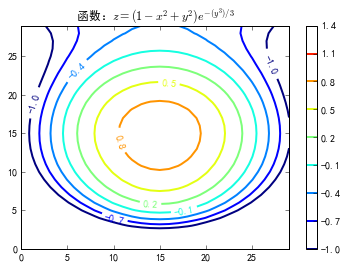

In [3]:
def process_signals(x, y):
    return (1-(x**2+y**2))*np.exp(-y**3/3)
x = np.arange(-1.5, 1.5, 0.1)
y = np.arange(-1.5, 1.5, 0.1)
X, Y =np.meshgrid(x, y) # 产生一个以向量x为行，向量y为列的矩阵
Z = process_signals(X, Y)
N = np.arange(-1, 1.5, 0.3)
CS = plt.contour(Z, N, linewidths=2, cmap=cm.jet)  # 绘制Z的等高线，水平数由N决定,并设置等高线线条的宽度和颜色
plt.clabel(CS, inline=True, fmt='%1.1f', fontsize=10)  # 为等高线添加标签并指定标签格式
plt.colorbar(CS)  # 显示颜色条
plt.title('函数：$z=(1-x^2+y^2) e^{-(y^3)/3}$')
plt.show()

# 填充图标底层区域

fill_between()方法：接收参数x（数据的x轴数组）和y1及y2（数据的y轴数组），通过参数，指定条件来决定要填充的区域。这个条件是一个布尔条件，通常指定y轴值范围。默认值为None，表示填充所有区域。

fill_betweenx()方法：雷同fill_between()方法，主要区别是该方法填充x轴的值之间的区域

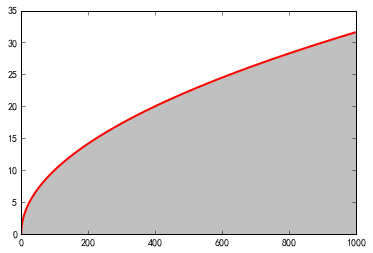

In [15]:
from math import sqrt
t = range(1000)
y = [sqrt(i) for i in t]
plt.plot(t, y, color='red', lw=2)
plt.fill_between(t, y, color='silver')
plt.show()

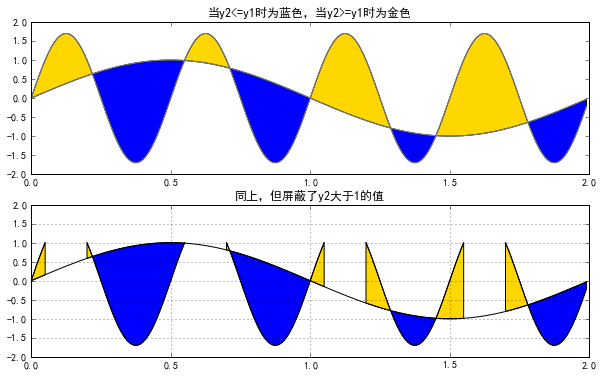

In [19]:
x = np.arange(0.0, 2, 0.01)
y1 = np.sin(np.pi*x)
y2 = 1.7*np.sin(4*np.pi*x)
fig = plt.figure(figsize=(10, 6))
axes1 = fig.add_subplot(211)
axes1.plot(x, y1, x, y2, color='grey')
axes1.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes1.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes1.set_title('当y2<=y1时为蓝色，当y2>=y1时为金色')
axes1.set_ylim(-2, 2)
# masked_greater()屏蔽了数组中大于给定值的所有值，该方法可用来处理缺失值或者无效的值
y2 = np.ma.masked_greater(y2, 1.0)
axes2 = fig.add_subplot(212, sharex=axes1)
axes2.plot(x, y1, x, y2, color='black')
axes2.fill_between(x, y1, y2, where=y2<=y1, facecolor='blue', interpolate=True)
axes2.fill_between(x, y1, y2, where=y2>=y1, facecolor='gold', interpolate=True)
axes2.set_title('同上，但屏蔽了y2大于1的值')
axes2.set_ylim(-2, 2)
axes2.grid('on')
plt.show()

# 绘制极线图

极线图通常被用来显示本质上是射线的信息。

在极坐标系统中，点被描述为半径距离（r）和角度（theta）。可以用polar()函数绘制极线图。polar()函数接收两个相同长度的参数数组theta和r分别用于角度数组和半径数组。我们仍然需要告诉matplotlib坐标轴要在极限坐标系统中。这通过向add_axes或add_subplot提供polar=True参数来完成。rgrids()用来切换半径网格的显示或设置标签。thetagrid()用来配置角度刻度和标签。

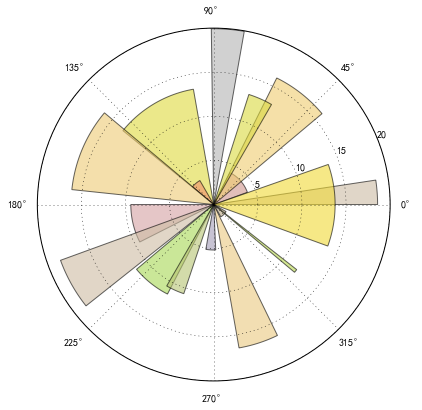

In [4]:
figsize = 7
colormap = lambda r: cm.Set2(r / 20.)
N = 18
fig = plt.figure(figsize=(figsize, figsize))
ax = fig.add_axes([0.2, 0.2, 0.7, 0.7], polar=True)   # 创建图表，并向其添加极限坐标轴
theta = np.arange(0.0, 2*np.pi, 2*np.pi/N)   # 为角度（theta）集合生成随机值
radii = 20* np.random.rand(N)   # 为极线距离（radii）集合生成随机值
width = np.pi /4 * np.random.rand(N)   # 为每一个极线条提供宽度集合
bars = ax.bar(theta, radii, width=width, bottom=0.0)
for r, bar in zip(radii, bars):   # 为了能够容易区分每一个极线条，循环遍历添加到坐标轴的每一个极线条
    bar.set_facecolor(colormap(r))  # 定制化每个极线条外观
    bar.set_alpha(0.6)
plt.show()

# 使用极线条可视化文件系统树

1.实现一些helper函数来处理找到的文件夹和其内部的数据结构。
2.实现绘图的主函数draw()。

In [ ]:
import os
def build_folders(start_path):
    folders = []
    for each in get_directories(start_path):
        size = get_size(each)
        if size >=25 * 1024 * 1024:
            folders.append({'size': size, 'path': each})
    for each in folders:
        print 'Path: '+ os.path.basename(each['path'])
        print 'Size: '+ str(each['size'] / 1024 / 1024) + " MB"
    return folders
def get_size(path):
    assert path is not None
    total_size = 0
    for dirpath, dirname, filenames, in os.walk(path):
        for f in filenames:
            fp = os.path.join(dirpath, f)
            try:
                size = os.path.getsize(fp)
                total_size += size
            except OSError as err:
                print str(err)
                pass
    return total_size
def get_directories(path):
    dirs = set()
    for dirpath, dirnames, filenames in os.walk(path):
        dirs = set([os.path.join(dirpath, x) for x in dirnames])
        break
    return dirs
def draw(folders):
    figsize = (8, 8)
    ldo, rup = 0.1, 0.8
    fig = plt.figure(figsize=figsize)
    ax = fig.add_axes([ldo, ldo, rup, rup], polar=True)
    x = [os.path.basename(x['path']) for x in folders]
    y = [y['size'] / 1024 / 1024 for y in folders]
    theta = np.arange(0.0, 2* np.pi, 2 * np.pi / len(x))
    radii = y
    bars = ax.bar(theta, radii)
    middle = 90 / len(x)
    theta_ticks = [t * (180 / np.pi) +middle for t in theta]
    lines, labels = plt.thetagrid(theta_ticks, labels=x, frac=0.5)
    for step, each in enumerate(labels):
        each.set_rotation(theta[step] * (180 / np.pi) + middle)
        each.set_fontsize(8)
    colormap = lambda r:cm.Set2(r / len(x))
    for r, each in zip(radii, bars):
        each.set_facecolor(colormap(r))
        each.set_alpha(0.5)
    plt.show()
if len(sys.argv) is not 2:
    print "Error: Please supply path to folder."
    sys.exit(-1)
start_path = sys.argv[1]
if not os.path.exists(start_path):
    print "Error: Path must exits."
    sys.exit(-1)
folders = bulid_folders(start_path)
if len(folders) < 1:
    print "Error: Path does not contain any folders."
    sys.exit(-1)
draw(folders)